<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/2_allrounds_and_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -Uqq fastai
!pip3 install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.3 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive

'Colab Notebooks'   Files


In [ ]:
%cd /content/gdrive/MyDrive/Files/2_allrounds_and_random

/content/gdrive/MyDrive/Files/2_allrounds_and_random


In [ ]:
!ls

2_allrounds_and_random.zip


In [ ]:
!unzip '/content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random.zip' -d '/content/gdrive/MyDrive/Files/2_allrounds_and_random'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/4_2.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/3_3.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/4_14.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/9_16.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/7_23.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/6_24.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/10_25.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/7_40.png  
  inflating: /content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random/4_44.png  
  inflating: /content/gdrive/MyDrive/Files/2_allro

In [ ]:
path = Path('/content/gdrive/MyDrive/Files/2_allrounds_and_random/2_allrounds_and_random')

In [ ]:
files = get_image_files(path)
#files[0]

In [ ]:
len(files)

66000

In [ ]:
pat = r'^(.*)_\d+.png'

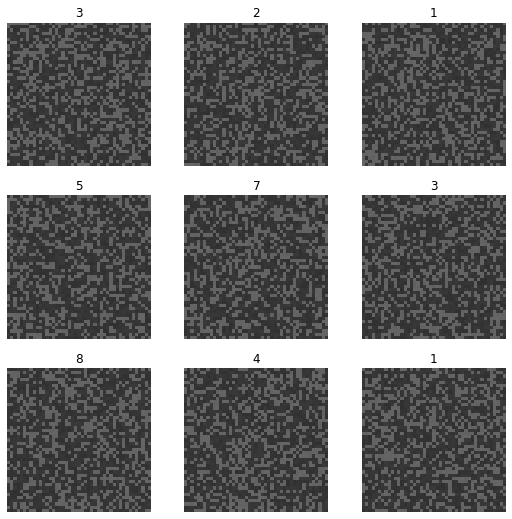

In [ ]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

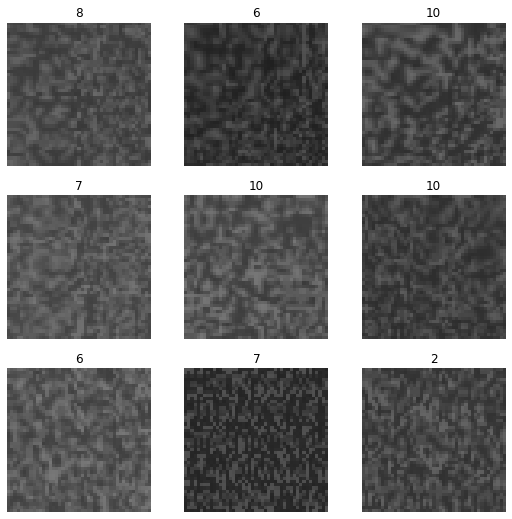

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.577991,2.480927,0.090909,03:08


epoch,train_loss,valid_loss,accuracy,time
0,2.448356,2.427183,0.089848,03:16
1,2.447241,2.423047,0.092803,03:13
2,2.454402,2.475765,0.085606,03:16
3,2.429078,2.420031,0.091667,03:18
4,2.410480,2.420481,0.092879,03:11
5,2.410189,2.403448,0.092955,03:17
6,2.399222,2.399710,0.096212,03:15
7,2.388225,2.395219,0.099773,03:14
8,2.378427,2.396201,0.096742,03:09
9,2.375329,2.395734,0.096439,03:12


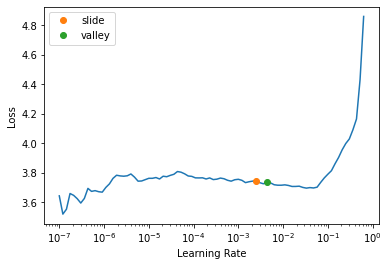

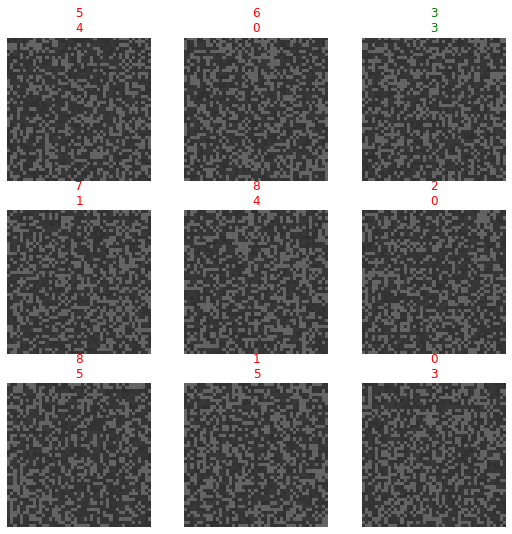

In [ ]:
# import timm
architecture = 'convnext_nano'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.649841,2.423646,0.091288,03:00


epoch,train_loss,valid_loss,accuracy,time
0,2.520765,2.399978,0.090000,03:09
1,2.473847,2.407195,0.091667,03:11
2,2.461036,2.401828,0.087348,03:21
3,2.451908,2.402467,0.093712,03:33
4,2.442665,2.399030,0.091364,03:22
5,2.429479,2.410385,0.088030,03:28
6,2.415239,2.398412,0.088788,03:23
7,2.409923,2.398365,0.091288,03:23
8,2.406201,2.398037,0.093333,03:29
9,2.406297,2.397923,0.090833,03:42


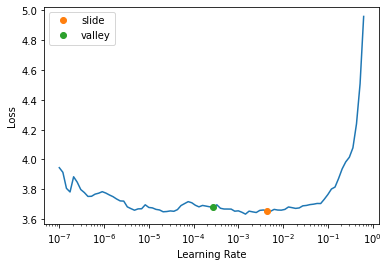

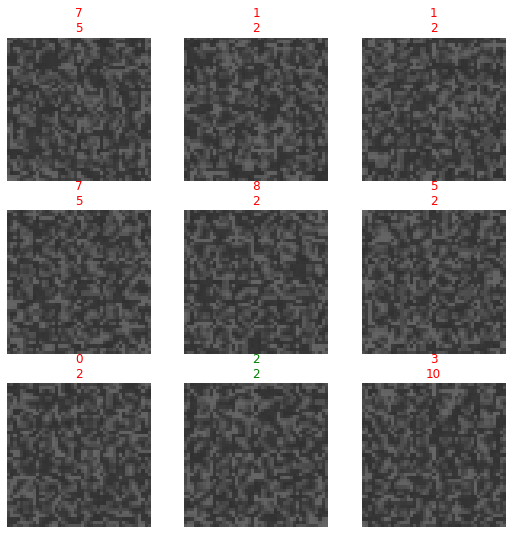

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet34

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.576040,2.484445,0.085076,03:37


epoch,train_loss,valid_loss,accuracy,time
0,2.451960,2.445348,0.081515,03:26
1,2.449261,2.430215,0.084242,03:25
2,2.450868,2.421477,0.096894,03:21
3,2.403786,2.407548,0.115530,03:25
4,2.311097,2.328964,0.128485,03:24
5,2.220948,2.328312,0.129621,03:21
6,2.165111,2.322030,0.125682,03:16
7,2.148404,2.338321,0.117727,03:24
8,2.124471,2.371049,0.103864,03:23
9,2.123251,2.356098,0.106515,03:04


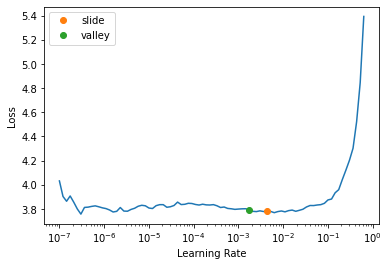

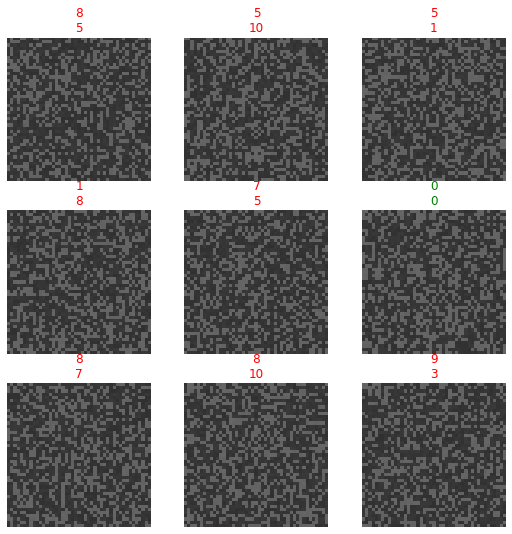

In [ ]:
architecture = 'resnet34'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.565807,2.490938,0.090076,03:04


epoch,train_loss,valid_loss,accuracy,time
0,2.443444,2.411799,0.090000,03:16
1,2.441758,2.413587,0.089091,03:16
2,2.457001,2.408164,0.088788,03:08
3,2.439622,2.408576,0.090682,03:10
4,2.430090,2.401809,0.097955,03:17
5,2.420077,2.400052,0.091212,03:26
6,2.407014,2.400809,0.087955,03:06
7,2.408359,2.399229,0.090758,03:09
8,2.404974,2.399045,0.087121,03:08
9,2.402302,2.398989,0.084091,03:05


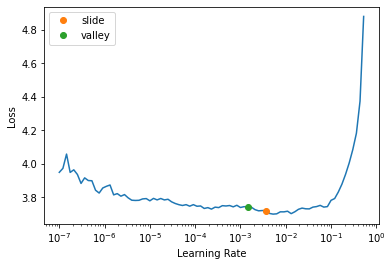

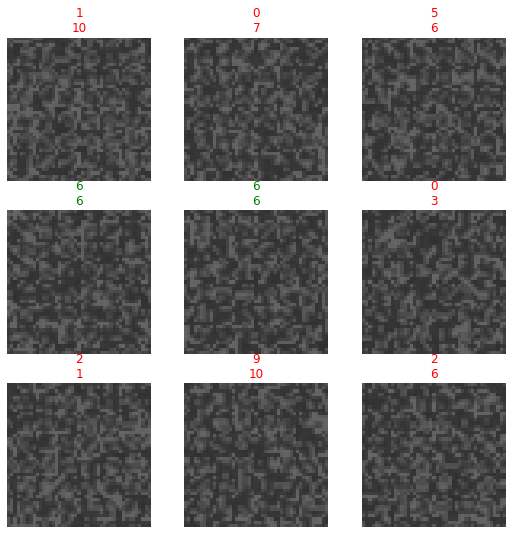

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.572970,2.840776,0.088864,03:59


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

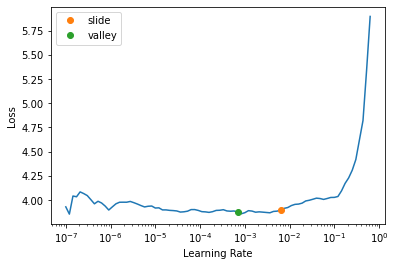

In [ ]:
architecture = 'resnet152'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#densenet121

In [ ]:
architecture = 'densenet121'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#darknet53

In [ ]:
architecture = 'darknet53'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#pnasnet5large

In [ ]:
architecture = 'pnasnet5large'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNext101_64x4d

In [ ]:
architecture = 'resnext101_64x4d'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()